<a href="https://colab.research.google.com/github/zhaooao/ai./blob/main/decision_tree_overfit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X, y = make_blobs(n_samples=600, centers=4,
                  random_state=0, cluster_std = 3.0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
otrn = []
otst = []
tree_depth = 51
for depth in range(1, tree_depth):
    tree = DecisionTreeClassifier(max_depth=depth)
    tree.fit(X_train, y_train)
    otrn.append(1-tree.score(X_train, y_train))
    otst.append(1-tree.score(X_test, y_test))

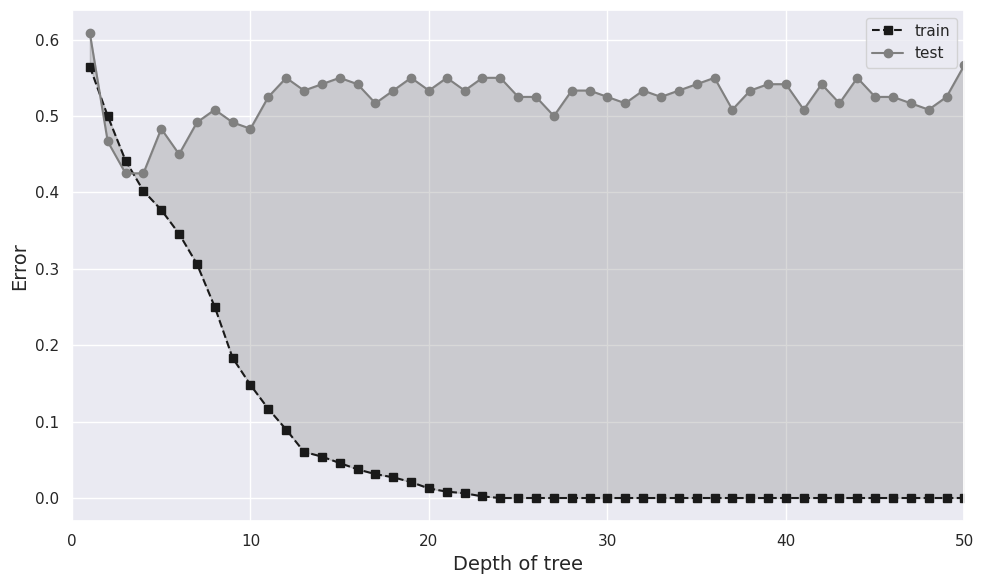

In [ ]:
divisors = range(1, tree_depth)
fig,ax=plt.subplots()
fig.set_size_inches((10,6))
_=ax.plot(divisors,otrn,'--s',label='train',color='k')
_=ax.plot(divisors,otst,'-o',label='test',color='gray')
_=ax.fill_between(divisors,otrn,otst,color='gray',alpha=.3)
_=ax.legend(loc=0)
_=ax.set_xlabel('Depth of tree',fontsize=14)
_=ax.set_ylabel('Error',fontsize=14)
_=ax.axis(xmin=0,xmax=50)
fig.tight_layout()